In [9]:
!pip install ace_tools

# 问卷数据分析
本 Notebook 实现以下功能：
1. 批量读取CSV文件，提取测试者姓名、测试环境和问卷数据
2. 汇总所有问卷数据
3. 统计每位测试者在每个环境下的平均得分
4. 按问题类型（EQ/T/CL）汇总数据

In [15]:
import pandas as pd
import os
import re
import glob

# 读取所有CSV文件
uploaded_files = glob.glob("./*.csv")
all_data = []

for file_path in uploaded_files:
    file_name = os.path.basename(file_path)
    name_match = re.match(r'[^_]+_([^_]+)_.*', file_name)
    tester_name = name_match.group(1) if name_match else "Unknown"

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    if len(lines) >= 2:
      second_line = ""
      try:
        env_path = lines[1].strip().split(',')[-1].replace("\\", "/")
        second_line = env_path.split('/')[-1].split('.')[0]
        environment_name = second_line if second_line!="" else "Unknown"
      except:
        environment_name = "Unknown"
    else:
      environment_name = "Unknown"

    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 6:
            question_code = parts[-2]
            score = parts[-1]
            if re.match(r'^(EQ|T|CL)\d+$', question_code):
                all_data.append({
                    'Tester': tester_name,
                    'Environment': environment_name,
                    'QuestionCode': question_code,
                    'Score': int(score)
                })

df = pd.DataFrame(all_data)
df

,Tester,Environment,QuestionCode,Score
0,so,noexplanation,EQ1,7
1,so,noexplanation,EQ2,4
2,so,noexplanation,EQ3,7
3,so,noexplanation,T1,2
4,so,noexplanation,T2,1
...,...,...,...,...
139,truth,visualexplanation,T2,4
140,truth,visualexplanation,T3,4
141,truth,visualexplanation,CL1,4
142,truth,visualexplanation,CL2,4


## 每位测试者在每个环境下的平均得分

In [16]:
# 平均得分统计
avg_scores = df.groupby(['Tester', 'Environment'])['Score'].mean().reset_index()
avg_scores.rename(columns={'Score': 'AverageScore'}, inplace=True)
avg_scores

,Tester,Environment,AverageScore
0,binghui,noexplanation,3.333333
1,binghui,visualexplanation,5.666667
2,binghui,vocalexplanation,2.888889
3,binghui,vvexplanation,5.888889
4,leo,noexplanation,6.888889
5,leo,visualexplanation,5.555556
6,leo,vocalexplanation,5.222222
7,leo,vvexplanation,7.222222
8,so,noexplanation,4.111111
9,so,visualexplanation,3.333333


## 按问题类型（EQ/T/CL）汇总平均得分

In [19]:
# 统计每个测试环境中，各题目的平均得分（不区分测试者）
df['QuestionType'] = df['QuestionCode'].str.extract(r'^(EQ|T|CL)')
env_question_avg = df.groupby(['Environment', 'QuestionCode'])['Score'].mean().reset_index()
env_question_avg.rename(columns={'Score': 'AverageScore'}, inplace=True)

env_question_avg

,Environment,QuestionCode,AverageScore
0,noexplanation,CL1,5.75
1,noexplanation,CL2,2.25
2,noexplanation,CL3,6.50
3,noexplanation,EQ1,7.50
4,noexplanation,EQ2,5.00
5,noexplanation,EQ3,5.75
6,noexplanation,T1,3.50
7,noexplanation,T2,3.00
8,noexplanation,T3,3.25
9,visualexplanation,CL1,4.75


from matplotlib import pyplot as plt
env_question_avg['AverageScore'].plot(kind='hist', bins=20, title='AverageScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
env_question_avg.groupby('Environment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
env_question_avg['AverageScore'].plot(kind='line', figsize=(8, 4), title='AverageScore')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(env_question_avg['Environment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(env_question_avg, x='AverageScore', y='Environment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-20-2392918540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(env_question_avg, x='AverageScore', y='Environment', inner='stick', palette='Dark2')


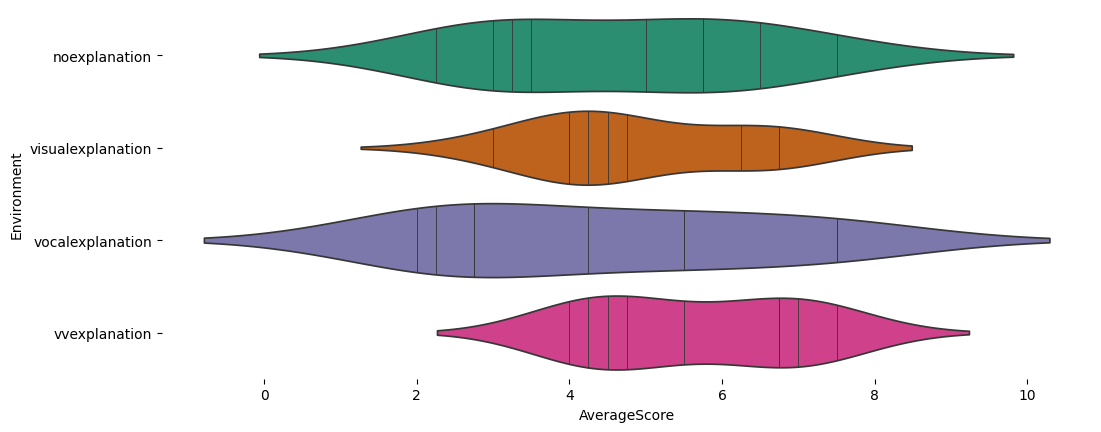

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(env_question_avg['Environment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(env_question_avg, x='AverageScore', y='Environment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


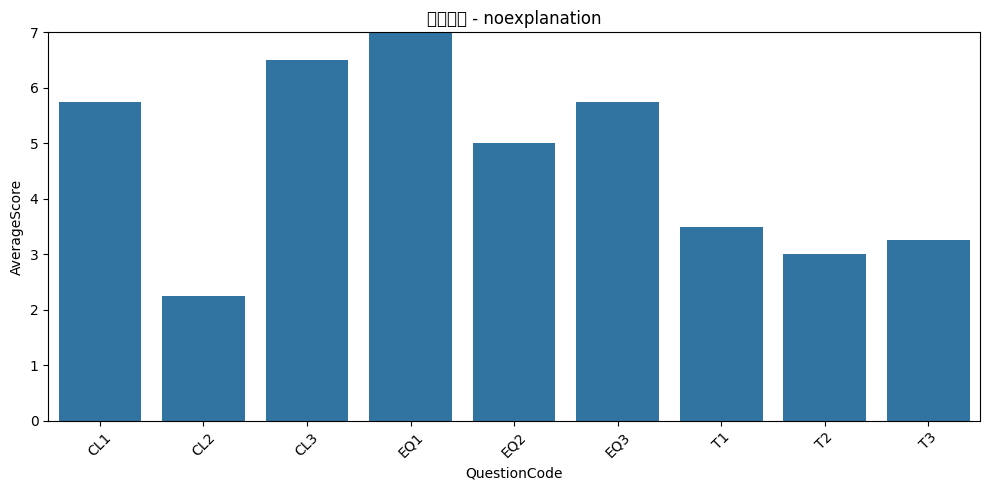

/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

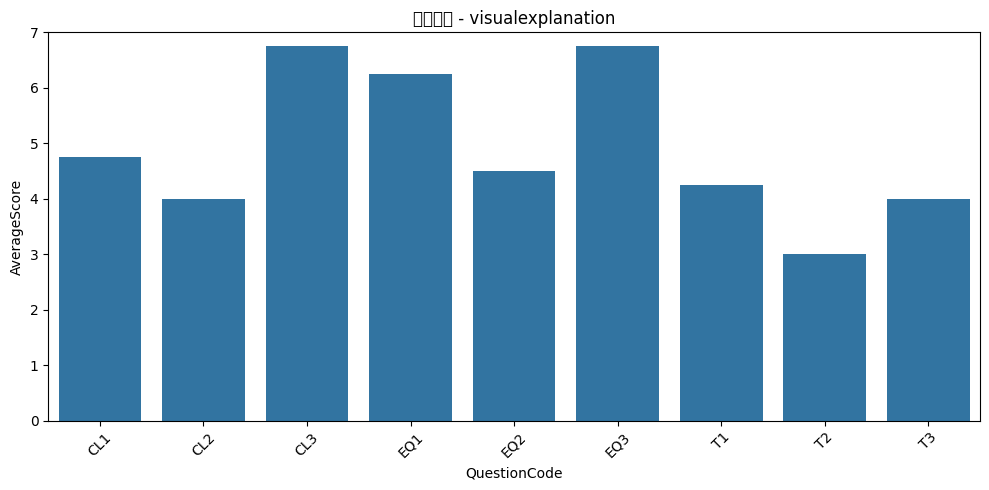

/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

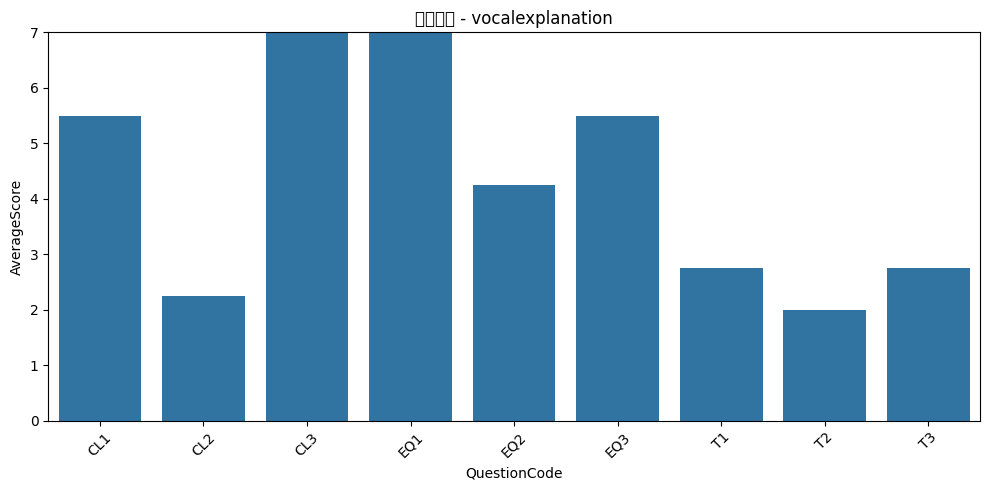

/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-634294872.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

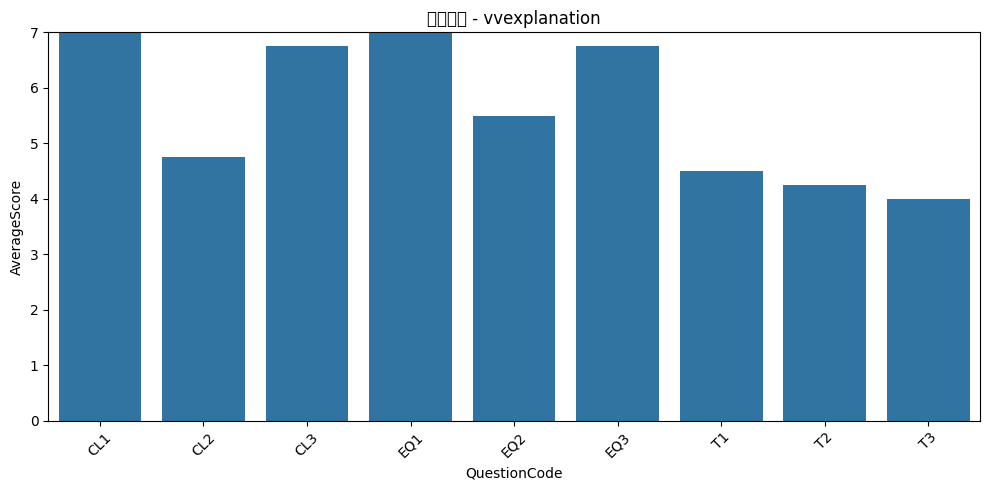

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图表样式
plt.figure(figsize=(12, 6))

# 创建条形图：每个环境一个子图
environments = env_question_avg['Environment'].unique()

for env in environments:
    plt.figure(figsize=(10, 5))
    subset = env_question_avg[env_question_avg['Environment'] == env]
    sns.barplot(data=subset, x='QuestionCode', y='AverageScore')
    plt.title(f'Average Score - {env}')
    plt.xticks(rotation=45)
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()


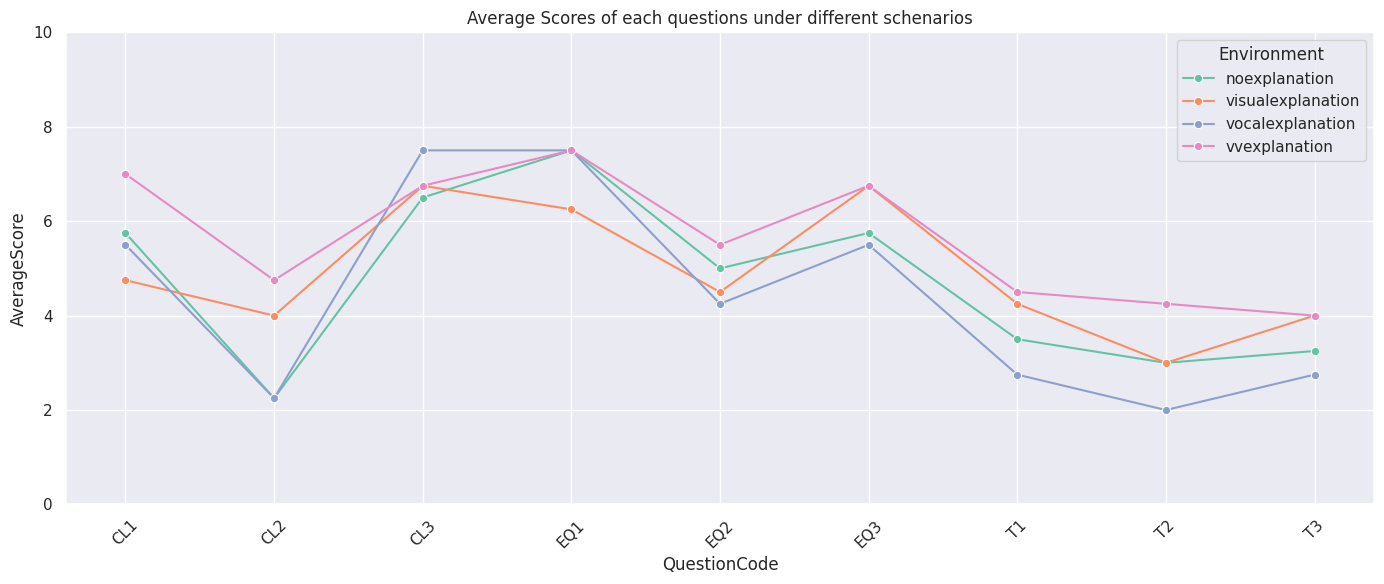

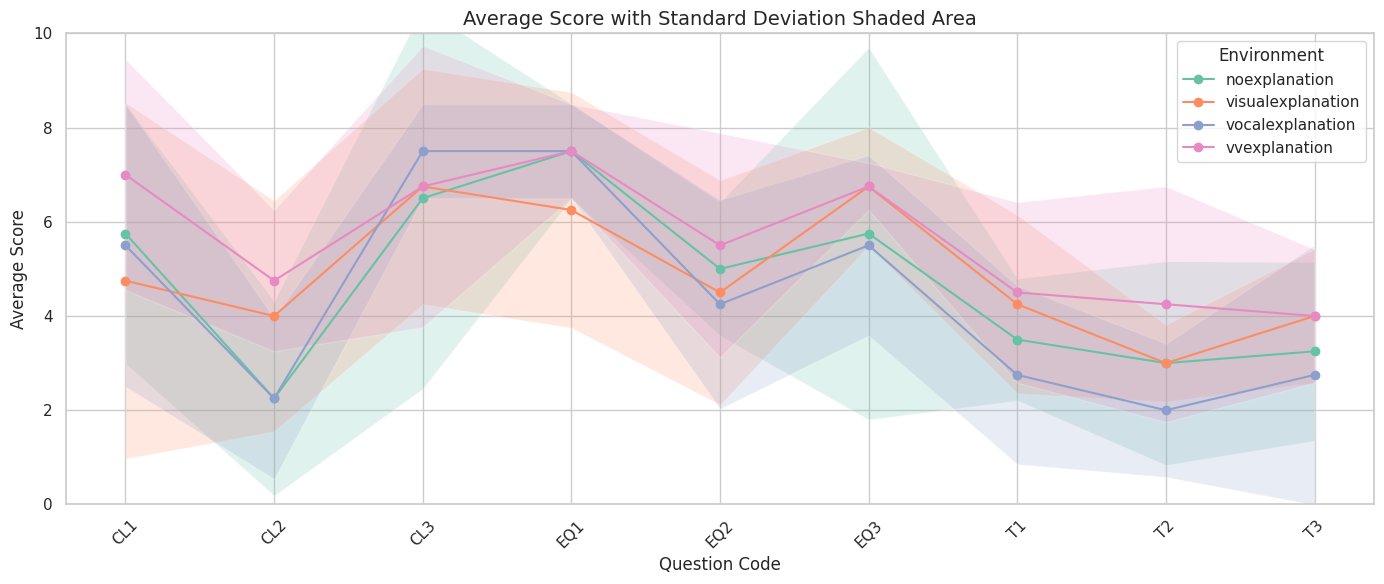

In [34]:
env_question_stats = df.groupby(['Environment', 'QuestionCode'])['Score'].agg(['mean', 'std']).reset_index()
env_question_stats.rename(columns={'mean': 'AverageScore', 'std': 'StdDev'}, inplace=True)

# 排序函数增加 try-except，防止个别值出错导致整个排序失败
def sort_key(x):
    try:
        return (x[:2], int(x[2:]))
    except Exception:
        return (x[:2], 999)  # 将无法转换的排到最后
sns.set(style="darkgrid", palette="Set2")
# 执行排序并绘图
ordered_questions = sorted(env_question_avg['QuestionCode'].unique(), key=sort_key)
env_question_avg['QuestionCode'] = pd.Categorical(env_question_avg['QuestionCode'],
                                                  categories=ordered_questions, ordered=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=env_question_avg, x='QuestionCode', y='AverageScore', hue='Environment', marker='o')
plt.title("Average Scores of each questions under different schenarios")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


sns.set_style("whitegrid")
sns.set_palette("Set2")  # 柔和易辨识
# 检查是否有缺失或非法的 std 数据（例如全部为 NaN）
env_question_stats_clean = env_question_stats.dropna(subset=['AverageScore', 'StdDev'])

plt.figure(figsize=(14, 6))

# 画每条线 + 标准差色块
for env in env_question_stats_clean['Environment'].unique():
    sub = env_question_stats_clean[env_question_stats_clean['Environment'] == env].sort_values("QuestionCode")

    x = sub['QuestionCode']
    y = sub['AverageScore']
    yerr = sub['StdDev']

    # 主折线
    plt.plot(x, y, label=env, marker='o')

    # 阴影色块（±1 标准差）
    plt.fill_between(x, y - yerr, y + yerr, alpha=0.2)

plt.title("Average Score with Standard Deviation Shaded Area", fontsize=14)
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.legend(title="Environment")
plt.show()

